# Analiza podatkov o prodaji avtomobilov preko spletnega oglaševalnika bolha #
Analiziral sem podatke spletnih oglasov avtomobilov na oglaševalniku [Bolha](https://www.bolha.com/avto-oglasi). Zajel sem veliko podatkov (je vozilo garažirano, leto modela, znamko,...), vendar jih je veliko neuporabnih zaradi pomankljivo izpolnjenih oglasov. Analiziral sem približno 5600 oglasov in probal odgovoriti na nekatera vprašanja, ki bi se jih marsikdo vprašal pri nakupovanju avtomobila. 

In [83]:
import pandas as pd
avti = pd.read_csv("C:\\Users\\jostv\\Desktop\\Gradivo\\2\\prog\\Analiza-podatkov\\fantazijski_romani\\koncni.csv")
avti = avti[["Cena", "Lokacija vozila", "Znamka avtomobila", "Model avtomobila", "Tip avtomobila", "Leto izdelave", "Prevoženi kilometri:", "Motor", "Delovna prostornina:", "Poraba goriva"]]
avti_popravljena_ocena = avti
avti_popravljena_ocena = pd.to_numeric(avti_popravljena_ocena["Cena"], errors="coerce")
avti["Cena"] = avti_popravljena_ocena
avti

,Cena,Lokacija vozila,Znamka avtomobila,Model avtomobila,Tip avtomobila,Leto izdelave,Prevoženi kilometri:,Motor,Delovna prostornina:,Poraba goriva
0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,4400.0,"""Obalno-kraška",Smart,fortwo coupe,passion cdi DPF Softouch,2013.0,190000.0,Diezel,799.0,3.3 l/100km
2,2000.0,"""Osrednjeslovenska",Peugeot,206,14HDI,2006.0,159000.0,Diezel,1398.0,NaN
3,0.0,"""Podravska",VW,Golf I,NaN,1996.0,111111.0,Diezel,1896.0,NaN
4,0.0,"""Podravska",BMW,serija 1,118d Advantage PO DELIH ALI V,2006.0,1.0,Diezel,1995.0,NaN
...,...,...,...,...,...,...,...,...,...,...
2806,0.0,"""Podravska",BMW,serija 3,318d Touring po delih ali v ce,2007.0,1.0,Diezel,1995.0,NaN
2807,0.0,"""Podravska",Ford,Focus,1.6 TDCi,2013.0,11111.0,Diezel,1560.0,NaN
2808,0.0,"""Podravska",Opel,Vectra Karavan,2.0 DTI,2004.0,11111.0,Diezel,1995.0,NaN
2809,0.0,"""Podravska",Hyundai,i20,1.2 Comfort PO DELIH ALI V CEL,2010.0,1.0,Bencin,1248.0,NaN


## Znamka
Nekateri prisegamo na dobre znamke, nekateri na malo slabše, spet drugim je popolnoma vseeno. Vendar katera znamka nam ponuja najboljši (rabljen) avtomobil za najmanj denarja? Poskusimo odgovoriti preko grafov.

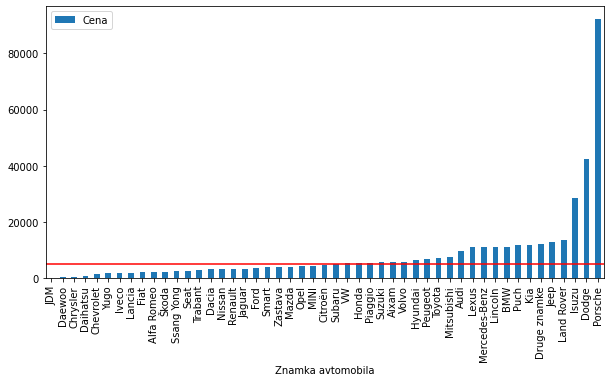

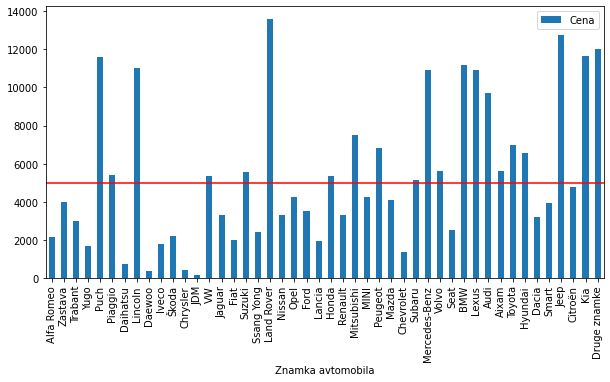

In [82]:
avti_po_znamkah = avti[avti.Cena > 100].groupby("Znamka avtomobila").mean()
avti_po_znamkah.sort_values("Cena").plot.bar(y="Cena", figsize=(10, 5)).axhline(color="red", y=5000)
avti_po_znamkah[avti_po_znamkah.Cena < 25000].sort_values("Leto izdelave").plot.bar(y="Cena", figsize=(10, 5)).axhline(color="red", y=5000)


Prvi graf nam prikazuje povprečno ceno avtomobila označene znamke, z rdečo črto pri 5000 eurih. Cene počasi naraščajo do 14000 eurov, potem pa skokoma narastejo pri dveh proizvajalcih najbolj znanih po dostavnih vozilih (t.i. pick-up trucki) in prestižni znamki Porsche. Ta anomalija je predvidljiva, saj so tovrstna vozila ena izmed dražjih na trgu, tako za vzdrževanje kot samo vožnjo.\
Drugi graf je bolj primeren za našega povprečnega kupca. Cene se omejene do 14000 eurov, znamke pa razvrščene po povprečni starosti vozil, kjer so znamke na levi starejše.\
Podatki so pri nekaterih znamkah lahko zavajajoči, saj oglasi podani brez cene niso vključeni v analizo.

## Tip motorja
Ena izmed aktualnih tem je tip motorja. Vedno bolj popularni postajajo elektromotorji, z dosti dodatki pri samem nakupu (novega) avtomobila kot z mnogimi prednostmi pri sami uporabi (rezervirana parkirišča,...). Medtem pa so nekateri dizelski motorji ponekod že prepovedani. 

In [92]:
tip_motorja = avti[avti.Cena > 100].groupby("Motor")
tip_motorja.mean()

,Cena,Leto izdelave,Prevoženi kilometri:,Delovna prostornina:
Motor,,,,
Bencin,5535.318436,2001.385475,160773.910615,1584.759777
Diezel,6645.504155,2009.567867,223214.299169,1942.409972
Hibrid,13758.166667,2012.833333,190008.333333,1665.666667


Vsak tip motorja ima svoje prednosti in slabosti. Posebaj previdni moramo biti pri starejših dizelskih saj bomo z njimi vedno bolj omejeni. Tip motorja načeloma ne vpliva pri nakupu (rabljenega) vozila.